In [2]:
# Dependencies 
import pandas as pd
import requests
import string
import matplotlib.pyplot as plt
from config import api_key

base_url = 'https://api.census.gov/data/2019/pep/population?get=NAME,POP&for=county:*&key='

In [3]:
response = requests.get(base_url + api_key).json()
print(len(response))

3221


In [10]:
fatal_crashes_file = 'csv_files/fatal_accidents_2019.csv'
crashes_df = pd.read_csv(fatal_crashes_file, low_memory=False)
crashes_df.columns

# crashes_df = crashes_df[['COUNTYNAME','STATENAME', 'State']]
# crash_count = crashes_df.groupby('COUNTYNAME').agg({'STATENAME':'max', 'State':'count'})

# crash_count.reset_index(inplace=True)

# #cleaning
# crash_count.COUNTYNAME = crash_count.COUNTYNAME.map(lambda x: x.split(' (')[0])
# #adding 'county' because I think it is easier than removing it from the population dataframe
# crash_count.COUNTYNAME = crash_count.COUNTYNAME.map(lambda x: x + ' COUNTY')

# crash_count.columns = ['CountyName', 'StateName', 'CrashCount']

# crash_count

Index(['Unnamed: 0', 'ARR_HOUR', 'ARR_HOURNAME', 'ARR_MIN', 'ARR_MINNAME',
       'CF1', 'CF1NAME', 'CF2', 'CF2NAME', 'CF3', 'CF3NAME', 'CITY',
       'CITYNAME', 'COUNTY', 'COUNTYNAME', 'CaseYear', 'DAY', 'DAY_WEEK',
       'DAY_WEEKNAME', 'DRUNK_DR', 'FATALS', 'FUNC_SYS', 'FUNC_SYSNAME',
       'HARM_EV', 'HARM_EVNAME', 'HOSP_HR', 'HOSP_HRNAME', 'HOSP_MN',
       'HOSP_MNNAME', 'HOUR', 'HOURNAME', 'LATITUDE', 'LATITUDENAME',
       'LGT_COND', 'LGT_CONDNAME', 'LONGITUD', 'LONGITUDNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'MILEPT', 'MILEPTNAME', 'MINUTE', 'MINUTENAME', 'MONTH',
       'MonthName', 'NHS', 'NHSNAME', 'NOT_HOUR', 'NOT_HOURNAME', 'NOT_MIN',
       'NOT_MINNAME', 'PEDS', 'PERMVIT', 'PERNOTMVIT', 'PERSONS', 'PVH_INVL',
       'RAIL', 'RAILNAME', 'RD_OWNER', 'RD_OWNERNAME', 'RELJCT1',
       'RELJCT1NAME', 'RELJCT2', 'RELJCT2NAME', 'REL_ROAD', 'REL_ROADNAME',
       'ROAD_FNC', 'ROAD_FNCNAME', 'ROUTE', 'ROUTENAME', 'RUR_URB',
       'RUR_URBNAME', 'SCH_BUS', 'SCH_BUSNAME', '

In [9]:
response.pop(0)
temp_pop_df = pd.DataFrame(response)
temp_pop_df.head()

[['NAME', 'POP', 'state', 'county'],
 ['Hidalgo County, New Mexico', '4198', '35', '023'],
 ['Hudson County, New Jersey', '672391', '34', '017'],
 ['Hunterdon County, New Jersey', '124371', '34', '019'],
 ['Morris County, New Jersey', '491845', '34', '027'],
 ['McKinley County, New Mexico', '71367', '35', '031'],
 ['Sandoval County, New Mexico', '146748', '35', '043'],
 ['Grant County, New Mexico', '26998', '35', '017'],
 ['Curry County, New Mexico', '48954', '35', '009'],
 ['Eddy County, New Mexico', '58460', '35', '015'],
 ['Mora County, New Mexico', '4521', '35', '033'],
 ['San Juan County, New Mexico', '123958', '35', '045'],
 ['Benton County, Mississippi', '8259', '28', '009'],
 ['Franklin County, Mississippi', '7713', '28', '037'],
 ['Coahoma County, Mississippi', '22124', '28', '027'],
 ['Jasper County, Mississippi', '16383', '28', '061'],
 ['Jones County, Mississippi', '68098', '28', '067'],
 ['Walthall County, Mississippi', '14286', '28', '147'],
 ['Monroe County, Mississippi'

In [5]:
pop_df = pd.DataFrame()
pop_df['CountyName'] = temp_pop_df[0].map(lambda x: x.split(',')[0].upper())
pop_df['StateName'] = temp_pop_df[0].map(lambda x: x.split(', ')[1])
pop_df['Population'] = temp_pop_df[1]

pop_df

,CountyName,StateName,Population
0,HIDALGO COUNTY,New Mexico,4198
1,HUDSON COUNTY,New Jersey,672391
2,HUNTERDON COUNTY,New Jersey,124371
3,MORRIS COUNTY,New Jersey,491845
4,MCKINLEY COUNTY,New Mexico,71367
...,...,...,...
3215,OKANOGAN COUNTY,Washington,42243
3216,KITTITAS COUNTY,Washington,47935
3217,BENTON COUNTY,Washington,204390
3218,CLARK COUNTY,Washington,488241


In [6]:
combined = pd.merge(crash_count, pop_df, how = 'inner', on= ['CountyName', 'StateName'])
combined.Population = combined.Population.astype(float)
combined.head()

,CountyName,StateName,CrashCount,Population
0,ABBEVILLE COUNTY,South Carolina,1,24527.0
1,ACCOMACK COUNTY,Virginia,5,32316.0
2,ADA COUNTY,Idaho,21,481587.0
3,ADAIR COUNTY,Oklahoma,11,22194.0
4,ADAMS COUNTY,Wisconsin,106,20220.0


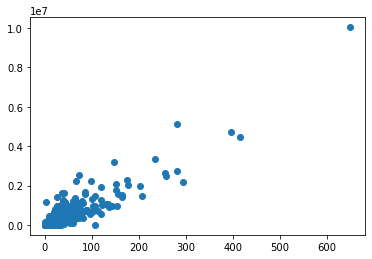

In [7]:
x_axis = combined.CrashCount
y_axis = combined.Population

plt.scatter(x_axis, y_axis)
plt.show()

In [8]:
combined.to_csv('csv_files/cleaned_county_vs_crash_count')